In [2]:
import pandas as pd
import statsmodels as st
import matplotlib.pyplot as plt

In [3]:
import numpy as np
def getUpperAndLowerOutlierThreshold(data):
    q75, q25 = np.percentile(data, [75 ,25])
    iqr = q75 - q25
    upperOutlier = q75 + iqr*1.5
    lowerOutlier = q25 - iqr*1.5
    return upperOutlier,lowerOutlier

In [4]:
colnames=['A','EDA', 'BVP', 'TEMP', 'EMG','NA'] 
labels = ['','EDA: electrodermal activity','BVP : Blood Volume pressure','TEMP:Temprature','EMG: Electrmygraphy','']

In [5]:
patientData = pd.read_table('/home/tivo/opensignals_000780589BB3_2016-04-02_22-21-24.txt',skiprows=3,header=None,names=colnames)

# DESCRIBE DATA

In [6]:
patientData.head()

,A,EDA,BVP,TEMP,EMG,NA
0,0,8554,38892,27877,32716,NaN
1,0,8557,38208,27881,32863,NaN
2,0,8552,38612,27828,32705,NaN
3,0,8550,38460,27828,32901,NaN
4,0,8553,38444,27951,32769,NaN


In [7]:
patientData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830750 entries, 0 to 4830749
Data columns (total 6 columns):
A       int64
EDA     int64
BVP     int64
TEMP    int64
EMG     int64
NA      float64
dtypes: float64(1), int64(5)
memory usage: 258.0 MB


In [8]:
features=['EDA', 'BVP', 'TEMP', 'EMG']
patientData = patientData[features]

In [9]:
patientData.describe()

,EDA,BVP,TEMP,EMG
count,4.830750e+06,4.830750e+06,4.830750e+06,4.830750e+06
mean,9.445235e+03,3.244875e+04,2.654954e+04,3.278219e+04
std,5.130711e+03,6.656131e+03,6.723459e+02,1.139080e+02
min,5.138000e+03,1.960000e+02,2.483000e+04,2.366000e+04
25%,6.584000e+03,3.210500e+04,2.606800e+04,3.269700e+04
50%,6.992000e+03,3.239900e+04,2.645500e+04,3.278100e+04
75%,1.058900e+04,3.263000e+04,2.711300e+04,3.286800e+04
max,3.191200e+04,6.537300e+04,2.825200e+04,3.885600e+04


In [10]:
patientData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4830750 entries, 0 to 4830749
Data columns (total 4 columns):
EDA     int64
BVP     int64
TEMP    int64
EMG     int64
dtypes: int64(4)
memory usage: 184.3 MB


In [11]:
%matplotlib inline

In [31]:
for i in features:
    upperOutlier,lowerOutlier = getUpperAndLowerOutlierThreshold(patientData[i])
    print("="*80)
    print (i)
    #print(patientData[i].describe())
    #print (upperOutlier, lowerOutlier)
    totalLen = patientData.shape[0]
    afterRemovingOutliers = (patientData[((patientData[i] < upperOutlier) & (patientData[i] > lowerOutlier ))].shape)[0]
    percentageOfOutliers = ( (totalLen - afterRemovingOutliers) / totalLen)*100
    print ("Outliers={} %".format(percentageOfOutliers))
    print ()

EDA
Outliers=9.21194431506495 %

BVP
Outliers=33.94553640739016 %

TEMP
Outliers=0.0 %

EMG
Outliers=0.5790198209387776 %



In [13]:
#Correlation among columns
patientData.corr()

,EDA,BVP,TEMP,EMG
EDA,1.000000,-0.002416,-0.291290,-0.014381
BVP,-0.002416,1.000000,-0.007990,-0.000072
TEMP,-0.291290,-0.007990,1.000000,0.062825
EMG,-0.014381,-0.000072,0.062825,1.000000


In [14]:
patientData.cov()

,EDA,BVP,TEMP,EMG
EDA,2.632420e+07,-8.252003e+04,-1.004838e+06,-8404.403683
BVP,-8.252003e+04,4.430407e+07,-3.575762e+04,-54.923432
TEMP,-1.004838e+06,-3.575762e+04,4.520490e+05,4811.485053
EMG,-8.404404e+03,-5.492343e+01,4.811485e+03,12975.027422


# EXPLORE DATA

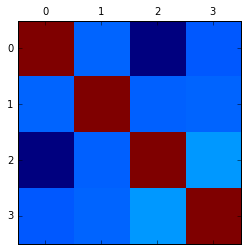

In [32]:
plt.matshow(patientData.corr())

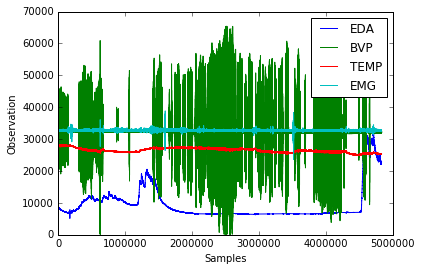

In [15]:
#plt.subplot(411)
plt.plot(patientData['EDA'])
plt.plot(patientData['BVP'])
plt.plot(patientData['TEMP'])
plt.plot(patientData['EMG'])
plt.legend(['EDA','BVP','TEMP','EMG'])

plt.ylabel("Observation")
plt.xlabel("Samples")

plt.savefig('all_test_plot.png', dpi=300)

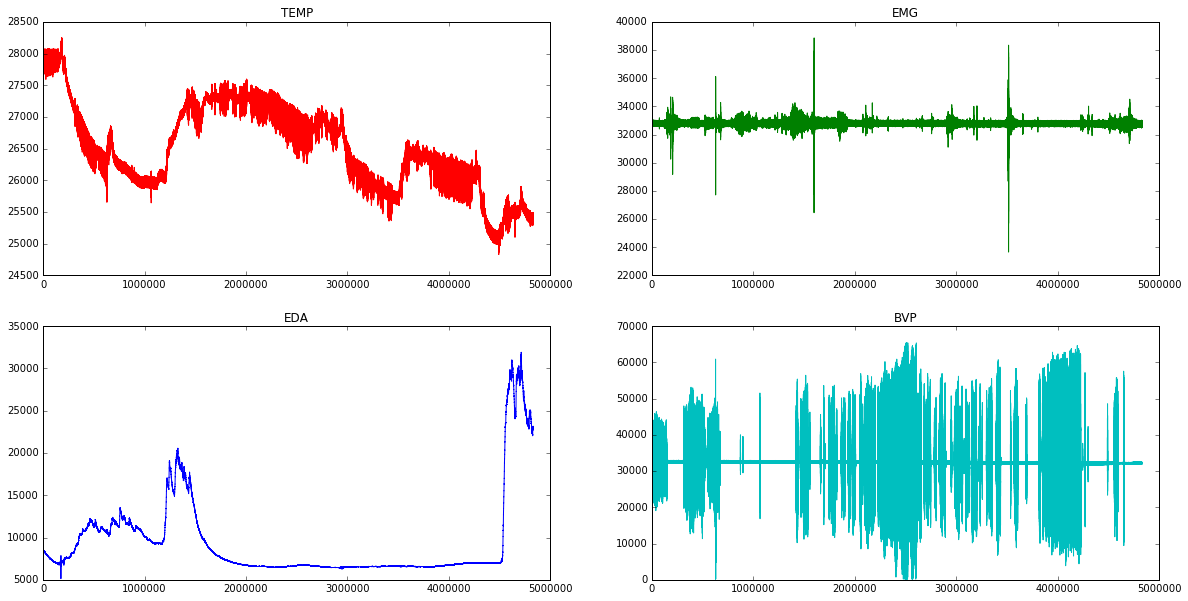

In [16]:
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20, 10))
plotIndex=["TEMP","EMG","EDA","BVP"]
colormap='rgbc'
plotTitles=[i for i in plotIndex]

index=0
ax1.plot(patientData[plotIndex[index]],color=colormap[index])
#ax1.xlabel('#Temp')
#ax1.ylabel('#Total')
ax1.set_title(plotTitles[index])

index+=1
ax2.plot(patientData[plotIndex[index]],color=colormap[index])
#ax2.xlabel('#EMG')
#ax2.ylabel('#Total')
ax2.set_title(plotIndex[index])

index+=1
ax3.plot(patientData[plotIndex[index]],color=colormap[index])
#ax3.xlabel('#EDA')
#ax3.ylabel('#Total')
ax3.set_title(plotIndex[index])

index+=1
ax4.plot(patientData[plotIndex[index]],color=colormap[index])
#ax4.xlabel('#BVP')
#ax4.ylabel('#Total')
ax4.set_title(plotIndex[index])

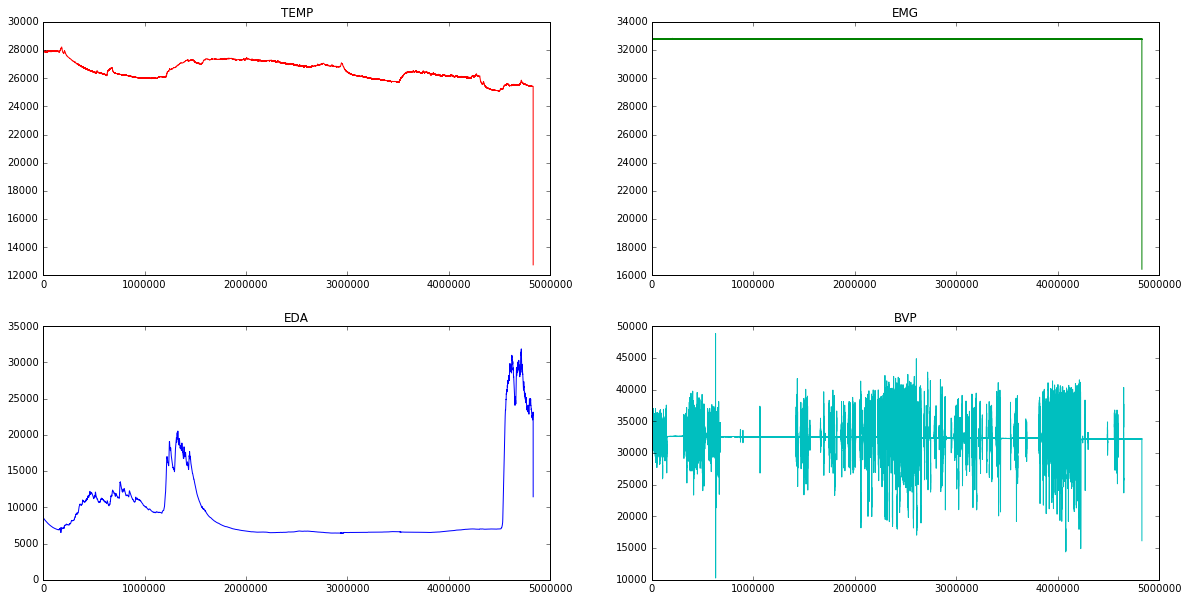

In [17]:
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20, 10))
plotIndex=["TEMP","EMG","EDA","BVP"]
colormap='rgbc'
plotTitles=plotIndex
maInterval = 600
def moving_average(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')
    #cumsum = np.cumsum(np.insert(interval, 0, 0)) 
    #return (cumsum[window_size:] - cumsum[:-window_size]) / window_size

index=0
ax1.plot(moving_average(patientData[plotIndex[index]],maInterval),color=colormap[index])
#ax1.xlabel('#Temp')
#ax1.ylabel('#Total')
ax1.set_title(plotTitles[index])

index+=1
ax2.plot(moving_average(patientData[plotIndex[index]],maInterval),color=colormap[index])
#ax2.xlabel('#EMG')
#ax2.ylabel('#Total')
ax2.set_title(plotIndex[index])

index+=1
ax3.plot(moving_average(patientData[plotIndex[index]],maInterval),color=colormap[index])
#ax3.xlabel('#EDA')
#ax3.ylabel('#Total')
ax3.set_title(plotIndex[index])

index+=1
ax4.plot(moving_average(patientData[plotIndex[index]],maInterval),color=colormap[index])
#ax4.xlabel('#BVP')
#ax4.ylabel('#Total')
ax4.set_title(plotIndex[index])

plt.savefig('all_test_ma_plot.png', dpi=300)

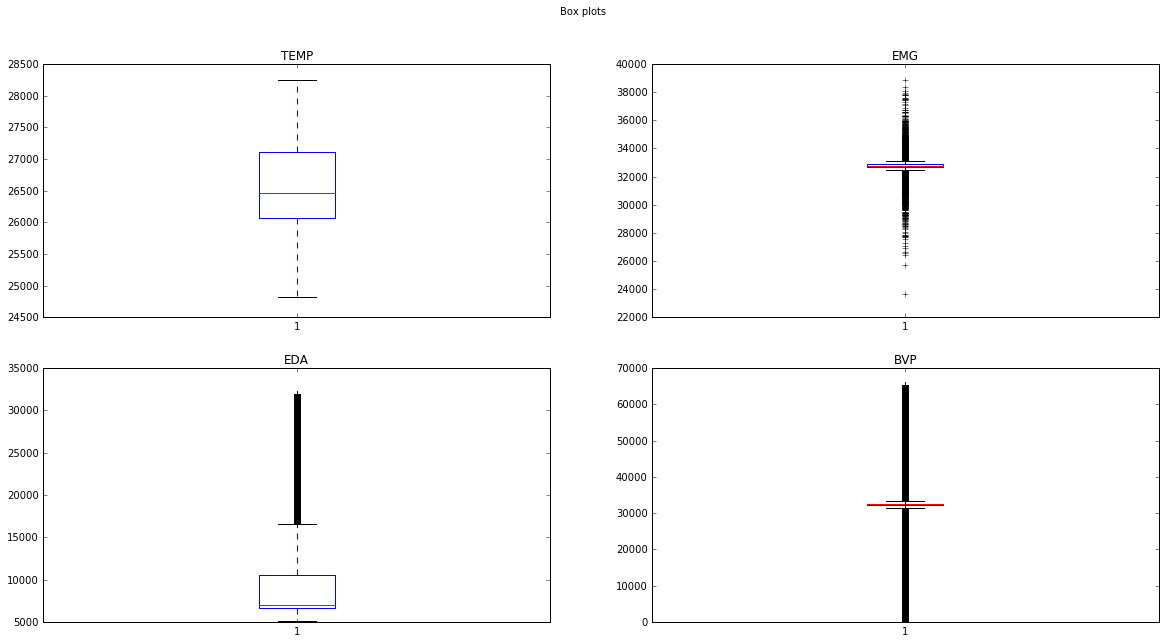

In [44]:
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20, 10))
plotIndex=["TEMP","EMG","EDA","BVP"]
colormap='rgbc'
plotTitles=plotIndex
maInterval = 600

index=0
ax1.boxplot(patientData[plotIndex[index]])
#ax1.xlabel('#Temp')
#ax1.ylabel('#Total')
ax1.set_title(plotTitles[index])

index+=1
ax2.boxplot(patientData[plotIndex[index]])
#ax2.xlabel('#EMG')
#ax2.ylabel('#Total')
ax2.set_title(plotIndex[index])

index+=1
ax3.boxplot(patientData[plotIndex[index]])
#ax3.xlabel('#EDA')
#ax3.ylabel('#Total')
ax3.set_title(plotIndex[index])

index+=1
ax4.boxplot(patientData[plotIndex[index]])
#ax4.xlabel('#BVP')
#ax4.ylabel('#Total')
ax4.set_title(plotIndex[index])
f.suptitle("Box plots")
f.savefig('all_test_boxplot.png', dpi=300)

In [19]:
noOfSamples = 600
patientData_ma = patientData.apply(lambda x: moving_average(x,noOfSamples))

In [20]:
patientData_ma.corr()

,EDA,BVP,TEMP,EMG
EDA,1.000000,-0.007645,-0.289862,-0.017344
BVP,-0.007645,1.000000,0.045917,0.054369
TEMP,-0.289862,0.045917,1.000000,0.191888
EMG,-0.017344,0.054369,0.191888,1.000000


In [25]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca1=pca.fit(patientData)
pca_2d = pca.transform(patientData)

In [26]:
pca_2d.shape

(4830750, 2)

In [27]:
km = KMeans(n_clusters = 2)

km.fit(patientData)

prediction = km.predict(patientData)

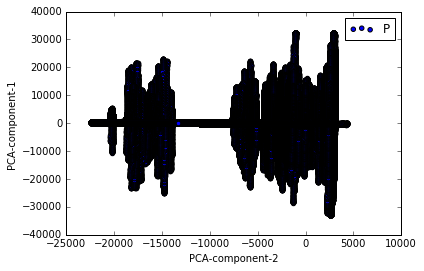

In [45]:
plt.scatter(pca_2d[:,1],pca_2d[:,0])
plt.xlabel("PCA-component-2")
plt.ylabel("PCA-component-1")
plt.legend("PCA")
#plt.title("PCA captures trend of data together and it looks effected by EDA and Temperature",va='bottom')
plt.savefig('PCA_plot.png', dpi=300)
#plt.plot(patientData['EDA'])

#plt.plot(patientData['TEMP'])
#plt.legend(['PCA showing clusters','EDA','TEMP'])
#pca_2d[:,0]

In [94]:
prediction[prediction == 1]
#plt.scatter(prediction)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [81]:
pca.components_

array([[  4.54968333e-03,  -9.99989397e-01,   7.11147468e-04,
          4.53973118e-07],
       [ -9.99238375e-01,  -4.51870364e-03,   3.87575110e-02,
          3.25798424e-04]])